In [1]:
# encoding=utf-8
import numpy as np
from scipy import sparse
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from sklearn import svm
from sklearn import neighbors
from sklearn import tree  
from sklearn import metrics
from sklearn import preprocessing
import math
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

c:\users\shenchao\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

label_a = pd.read_csv("label.csv")
label_a1 = label_a['ID_1']
label_a2 = label_a['ID_2']
S_Y_A = label_a1.values
T_Y_A = label_a2.values


label = pd.read_csv("select_label.csv")
label1 = label['ID_1']
label2 = label['ID_2']
S_Y = label1.values
T_Y = label2.values

In [3]:
features_a = pd.read_csv("feature.csv")
features_a = features_a.values
S_X_A = features_a[:,1:5]
T_X_A = features_a[:,5:9]
features = pd.read_csv("select_feature.csv")
features = features.values
S_X = features[:,1:5]
T_X = features[:,5:9]



ss_X = StandardScaler()
S_X = ss_X.fit_transform(S_X)
T_X = ss_X.fit_transform(T_X)
T_X_A = ss_X.fit_transform(T_X_A)

c:\users\shenchao\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
np.savetxt('sy.csv',S_Y, delimiter=',', fmt='%.6f')
np.savetxt('ty.csv',T_Y, delimiter=',', fmt='%.6f')
np.savetxt('sx.csv',S_X, delimiter=',', fmt='%.6f')
np.savetxt('tx.csv',T_X, delimiter=',', fmt='%.6f')

In [5]:
S=np.concatenate((S_X,S_Y.reshape(-1,1)),axis=1)#样本和标签拼接
T=np.concatenate((T_X,T_Y.reshape(-1,1)),axis=1)
S_T=np.hstack((S,T))
np.shape(S_T)
df = DataFrame(S_T,columns=['s1','s2','s3','s4','ys','t1','t2','t3','t4','yt'])

In [6]:
#train_sample=df[df['ys'] ==df['yt']]
X_train = df.iloc[:,:4]
y_train = df.iloc[:,4:5]
label= df.iloc[:,4:5]
X_val = df.iloc[:,5:9]
y_val = df.iloc[:,9:10]


In [7]:
d={1:'b',
   2:'g',
   3:'c',
   4:'r',
   5:'black',
   6:'orange'
}

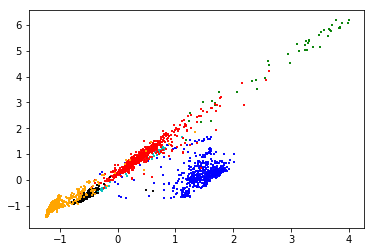

In [10]:
for i in [1,2,3,4,5,6]:
    plt.scatter(df['s1'][df.ys==i],
                df['s2'][df.ys==i],
                s=1,marker=',',c=d.get(i))
#plt.axis([-2,5,-2,7])
plt.show()

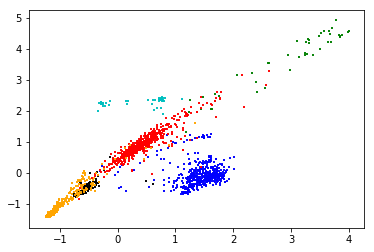

In [11]:
for i in [1,2,3,4,5,6]:
    plt.scatter(df['s1'][df.ys==i],
                df['s3'][df.ys==i],
                s=1,marker=',',c=d.get(i))
#plt.axis([-2,5,-2,7])
plt.show()

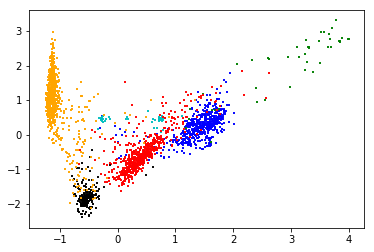

In [12]:
for i in [1,2,3,4,5,6]:
    plt.scatter(df['s1'][df.ys==i],
                df['s4'][df.ys==i],
                s=1,marker=',',c=d.get(i))
#plt.axis([-2,5,-2,7])
plt.show()

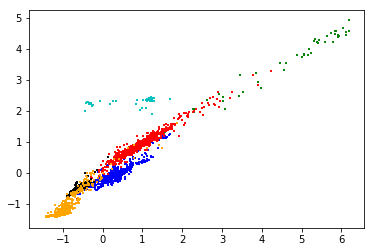

In [13]:
for i in [1,2,3,4,5,6]:
    plt.scatter(df['s2'][df.ys==i],
                df['s3'][df.ys==i],
                s=1,marker=',',c=d.get(i))
#plt.axis([-2,5,-2,7])
plt.show()

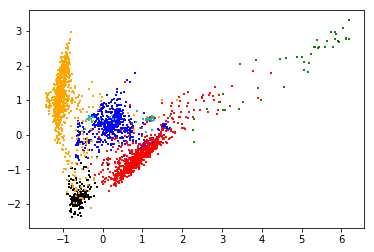

In [14]:
for i in [1,2,3,4,5,6]:
    plt.scatter(df['s2'][df.ys==i],
                df['s4'][df.ys==i],
                s=1,marker=',',c=d.get(i))
#plt.axis([-2,5,-2,7])
plt.show()

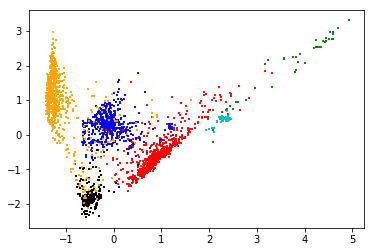

In [15]:
for i in [1,2,3,4,5,6]:
    plt.scatter(df['s3'][df.ys==i],
                df['s4'][df.ys==i],
                s=1,marker=',',c=d.get(i))
#plt.axis([-2,5,-2,7])
plt.show()